# Part I - Ford GoBike System Data
## by Jerry Liu

## Introduction

This data set is taken from [Ford GoBike System Data](https://www.fordgobike.com/system-data) and represents trips taken by members of the service for month of February of 2019.

**Content**

Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

we need to convert the `start_time` and `end_time`'s dtype to datetime and convert coordinate's dtype to string.

In [5]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# check missing value
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are many missing values in `member_birth_year` and `member_gender`, which will affect our analysis. So, we have to drop the na values.

In [7]:
# check duplicate value
sum(df.duplicated())

0

## Clean Data

In [8]:
# since we can not know the member's birth year and their gender, so we drop all the na values first
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [9]:
# convert start and end_time's dtype to datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# Convert coordinate dtype to string
coordinate_cols = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']

df[coordinate_cols] = df[coordinate_cols].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  object        
 6   start_station_longitude  174952 non-null  object        
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  object        
 10  end_station_longitude    174952 non-null  object        
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [10]:
# it's more intuitive that duration is min than the sec
# so we convert it to the minute
df['duration_min'] = df['duration_sec'] / 60
df = df.drop(columns=['duration_sec'])

In [11]:
df['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [12]:
# we can use birth year to round the customer's age
df['age'] = round(2019 - df['member_birth_year'], 0)
df['age'] = df['age'].astype(int)
df['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

There are some errors in the birth year. Let's try to inspect it using a histogram plot.

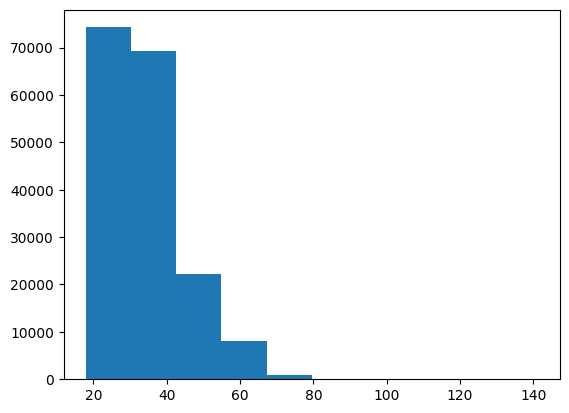

In [13]:
plt.hist(x=df['age']);

In [14]:
# check the age over 65 
print((df.age > 70).value_counts())

False    174377
True        575
Name: age, dtype: int64


`member_age` over 70 years is too small. Let's drop the rows.

In [15]:
# drop the rows and reset the index
df = df.drop(df[df['age'] > 70].index).reset_index(drop=True)
df['age'].describe()

count    174377.000000
mean         34.038876
std           9.714521
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          70.000000
Name: age, dtype: float64

In [16]:
df.shape

(174377, 17)

### What is the structure of your dataset?

There are 174,377 data in the dataset with seventeen features(duration, start_time, end_time, station information, bike_id, member_birth_year, member_gender, etc.

### What is/are the main feature(s) of interest in your dataset?

Features like `duration_min`, `start time`, `age`, `user_type` and `member gender` may play a crucial role in understanding and analyzing the bike-sharing system's usage.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- **User type:** To analyze whether the user subscribes, will you make the difference in duration_min, gender, or age?

- **Member birth year and member gender:** To analyze users' demographics and see if certain age groups or genders exhibit specific riding patterns.

## Univariate Exploration

Let's see the distribution of `duration_min`.

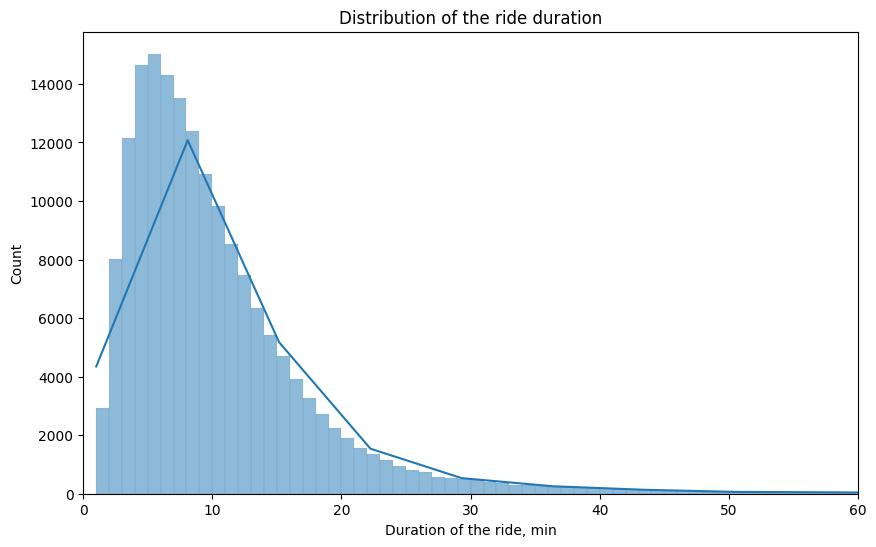

In [17]:
bins = np.arange(0, max(df.duration_min)+1, 1)
plt.figure(figsize=(10,6))
sns.histplot(data = df, x='duration_min', bins = bins, kde=True)
plt.title('Distribution of the ride duration')
plt.xlabel('Duration of the ride, min')
plt.xlim(0, 60);

We can see that most of the users spent less than 20 minutes. Since we already know the users spent less than one hour, we can now look at the distribution of the start ride hours to find the most popular time.

We'll need to create new columns to indicates an hour when the ride started first.

In [18]:
df['start_time_hour'] = np.nan
df['start_time_hour'] = df['start_time'].apply(lambda x: x.hour)
df.head(2)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,start_time_hour
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.7896254,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.75,35,17
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.7693053,-122.4268256,3.0,Powell St BART Station (Market St at 4th St),37.78637526861584,-122.40490436553954,5905,Customer,1972.0,Male,No,1030.90,47,12


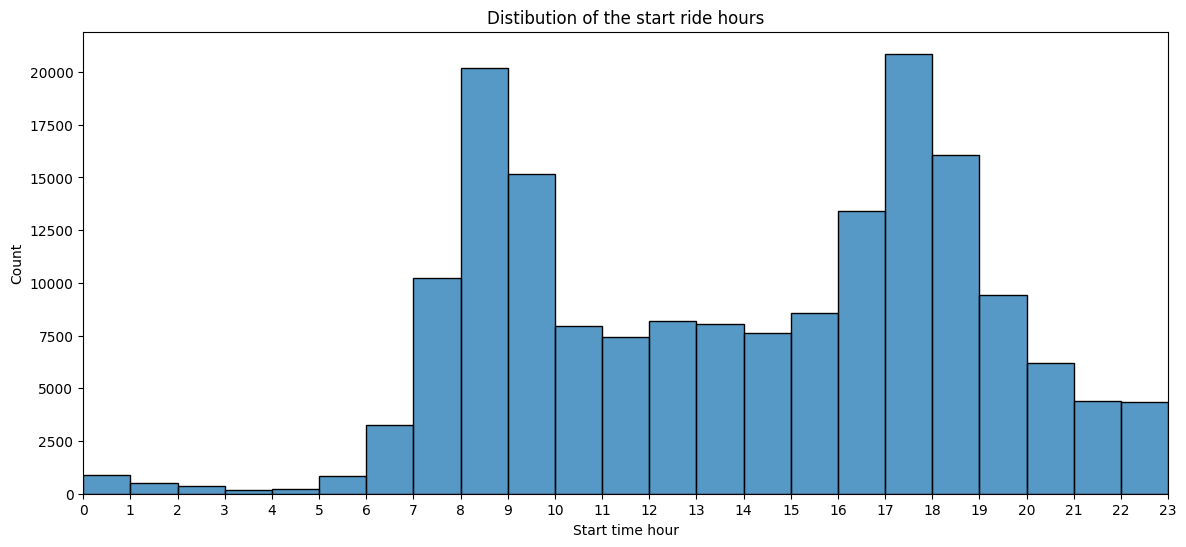

In [19]:
#Distribution of the ride starting time.
bins = np.arange(0, max(df.start_time_hour)+1, 1)
plt.figure(figsize=(14,6))
sns.histplot(data = df, x=df.start_time_hour, bins = bins)
plt.title('Distibution of the start ride hours')
plt.xlabel('Start time hour')
plt.xticks(range(0,24))
plt.xlim(0,23);

Looking at the chart above, we can see that the peak usage times resemble typical commuting hours and school hours.

Let's look at the distribution of `user_type` and `gender`.

In [20]:
# Function to plot bar with percentage and sort value labels
def plot_bar_with_label(data, color, ax):
    counts = data.value_counts(normalize=True) * 100
    sns.barplot(x=counts.index, y=counts.values, color=color, ax=ax)
    
    for i, count in enumerate(counts.values):
        ax.text(i, count + 1, f'{count:.1f}%', ha='center', va='bottom')

    ax.set_ylim(0, 100)
    ax.set_ylabel('Percentage (%)')

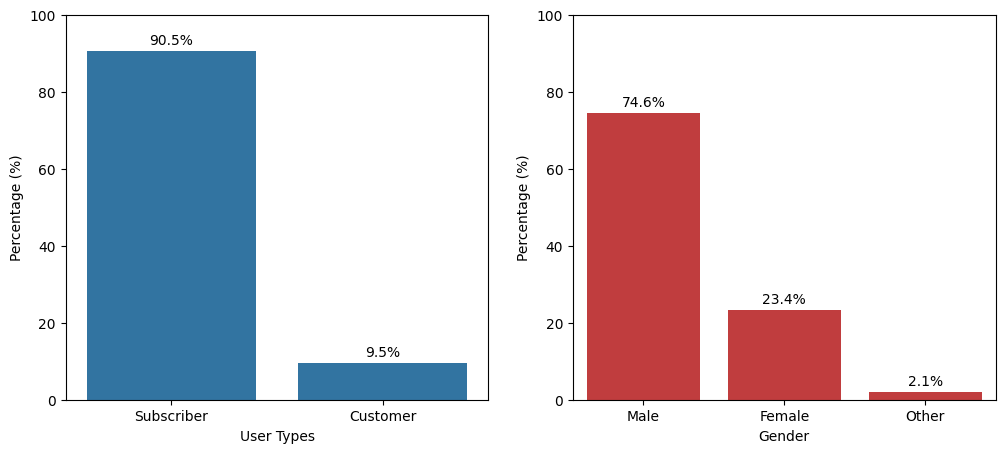

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for 'user_type'
plot_bar_with_label(df['user_type'], 'tab:blue', ax1)
ax1.set_xlabel('User Types')

# Plot for 'member_gender'
plot_bar_with_label(df['member_gender'], 'tab:red', ax2)
ax2.set_xlabel('Gender')

plt.show()

In a good way, the subscribers are over 90%. Surprisingly, there are far more males than females using the GoBike system. Maybe we can check the bivariate later about the distribution from subscribers and gender.

Let's see the distribution of `age`.

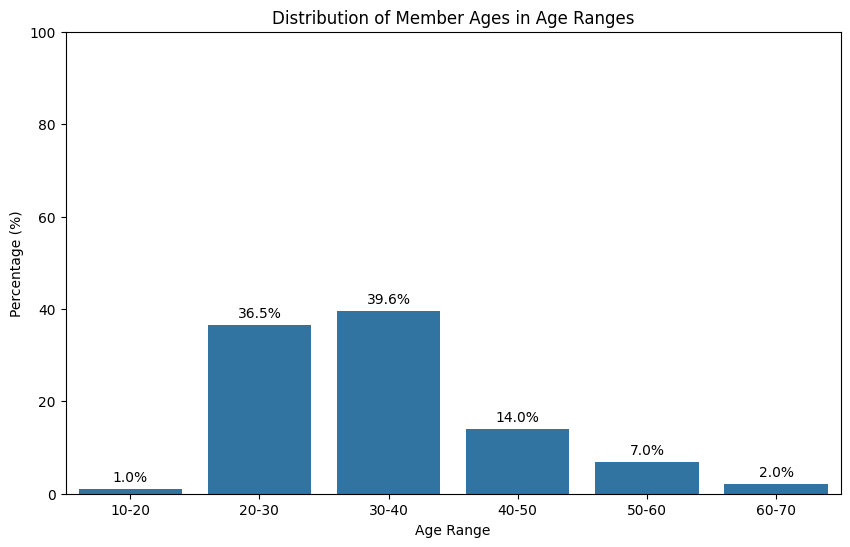

In [22]:
# Define age ranges
age_bins = np.arange(10, 71, 10)
age_labels = [f'{start}-{end}' for start, end in zip(age_bins[:-1], age_bins[1:])]


# Create a new column 'age_range'
df['age_range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate age range counts
age_range_counts = df['age_range'].value_counts(normalize=True) * 100

# Sort the Series by age labels
age_range_counts = age_range_counts.reindex(age_labels)

# Plot the bar chart with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=age_range_counts.index, y=age_range_counts.values, color='tab:blue')

# Add actual age range labels to the bars
for i, count in enumerate(age_range_counts.values):
    plt.text(i, count + 1, f'{count:.1f}%', ha='center', va='bottom')

plt.xlabel('Age Range')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Member Ages in Age Ranges')
plt.ylim(0, 100)

plt.show()

This plot shows that most users are around 21 to 40 years old. We can focus on these two groups when we check the bivariate later. And we can compare the start time distribution between 21-40 years and other age groups.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There are some unusual cases in both duration and age, so for duration, we first examine ride times within 60 minutes. Regarding age, we exclude examples over 100 years old and eliminate those over 70 years old, as this age group appears to have fewer shared bike users.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

We add columns like `start_time_hour` and `age` to inspect the usage time and age distribution. And find that most users are 20-40 years old, male, and belong to the subscriber.

## Bivariate Exploration

We first look at the distribution of `user_type` for `member_gender`.

In [23]:
# filter only male and female
df_filter = df.loc[df['member_gender'].isin(['Male', 'Female'])]
df_filter.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,start_time_hour,age_range
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.7896254,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,35,17,30-40
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.7693053,-122.4268256,3.0,Powell St BART Station (Market St at 4th St),37.78637526861584,-122.40490436553954,5905,Customer,1972.0,Male,No,1030.900000,47,12,40-50
3,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.8045623549303,-122.27173805236816,222.0,10th Ave at E 15th St,37.7927143,-122.2487796,4898,Subscriber,1974.0,Male,Yes,26.416667,45,23,40-50
4,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.7704074,-122.3911984,323.0,Broadway at Kearny,37.79801364395978,-122.40595042705534,5200,Subscriber,1959.0,Male,No,29.883333,60,23,60-70
5,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.3172979,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,19.116667,36,23,30-40


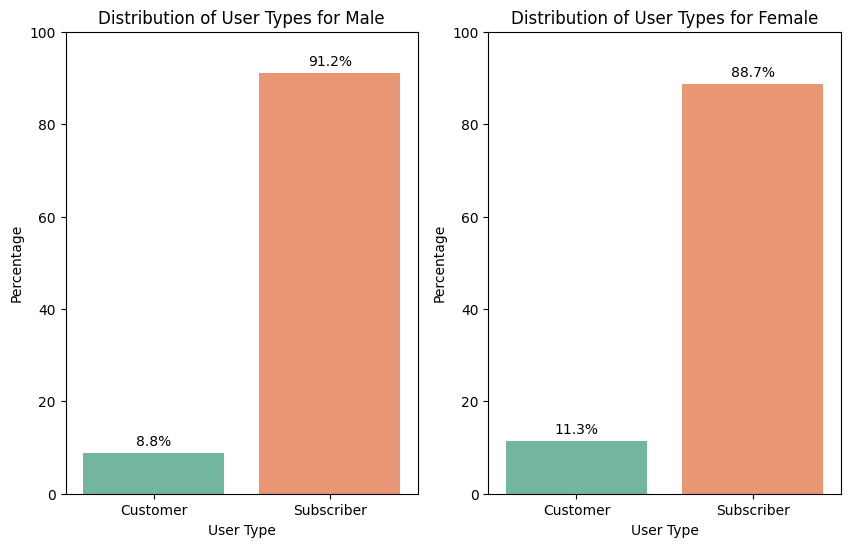

In [24]:
plt.figure(figsize=(10, 6))

# Calculate percentages
total_counts = len(df_filter)
counts = df_filter.groupby(['member_gender', 'user_type']).size().reset_index(name='count')
counts['percentage'] = counts.groupby('member_gender')['count'].transform(lambda x: x / x.sum() * 100)

# Create subplots
unique_genders = df_filter['member_gender'].unique()
for i, gender in enumerate(unique_genders, start=1):
    plt.subplot(1, 2, i)
    gender_counts = counts[counts['member_gender'] == gender]

    # Plot countplot for each gender
    sns.barplot(data=gender_counts, x='user_type', y='percentage', palette='Set2')

    # Add percentage value labels
    for j, p in enumerate(gender_counts['percentage']):
        plt.text(j, p + 1, f'{p:.1f}%', ha='center', va='bottom')

    plt.xlabel('User Type')
    plt.ylabel('Percentage')
    plt.title(f'Distribution of User Types for {gender.capitalize()}')
    plt.ylim(0, 100);


The distribution of `user_type` for the `member_gender` does not seem to differ significantly. The distribution of `user_tye` is subscriber 90.5% and customer 8.8%. Surprisingly, although females are far less than males, the distribution looks no different between each gender.

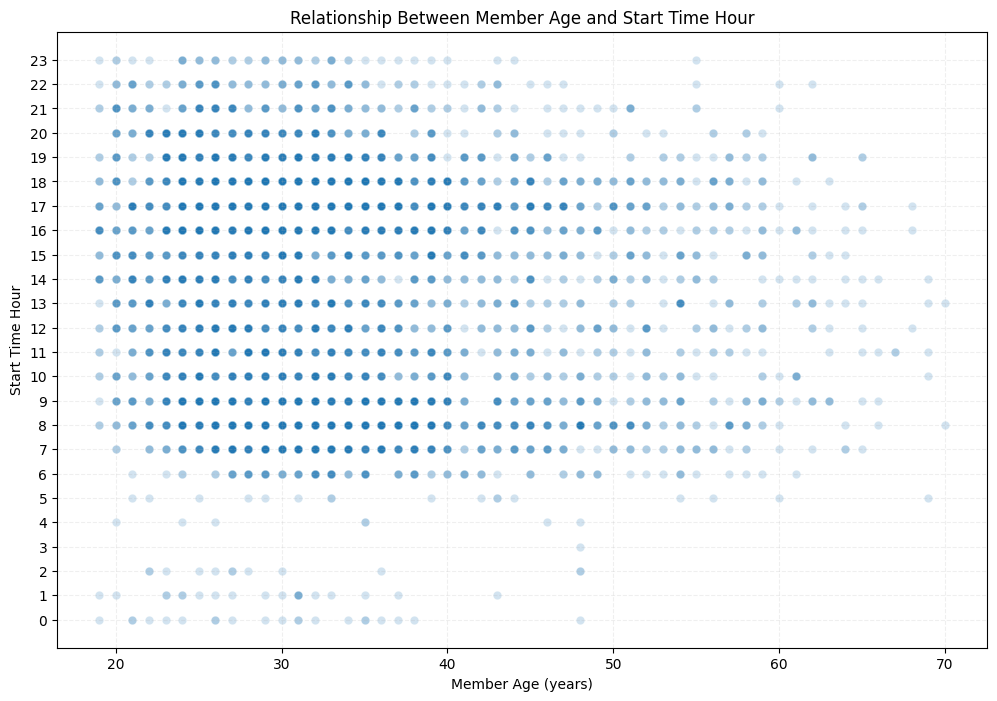

In [25]:
# Sample a subset of data for better visualization
sampled_data = df.sample(5000, replace=False)

plt.figure(figsize=(12, 8))

# Create a scatter plot
sns.scatterplot(data=sampled_data, x='age', y='start_time_hour', alpha=0.2, color='tab:blue')

# Set axis labels and title
plt.xlabel('Member Age (years)')
plt.ylabel('Start Time Hour')
plt.title('Relationship Between Member Age and Start Time Hour')

# Set y-axis ticks to represent 24-hour format
plt.yticks(range(0, 24))

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.2)

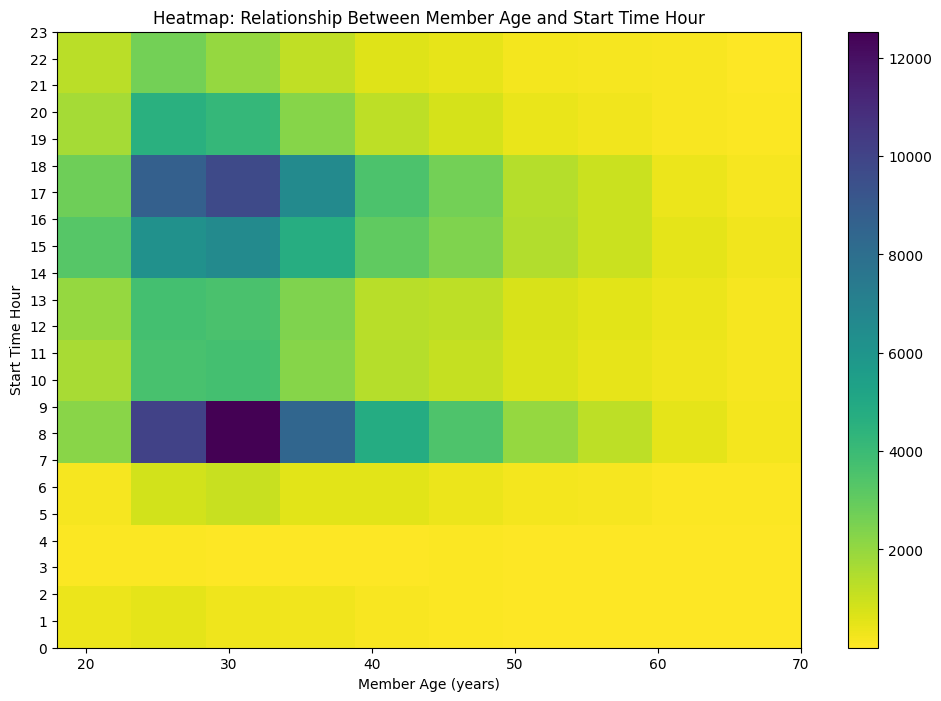

In [26]:
bins_xb = np.arange(0, max(df.age)+2, 2)
bins_yb = np.arange(0, max(df.start_time_hour)+1, 1)

plt.figure(figsize=(12, 8))

# Create a 2D histogram (heatmap) using seaborn
plt.hist2d(data=df, x='age', y='start_time_hour', cmap = 'viridis_r')
plt.colorbar()

# Set axis labels and title
plt.xlabel('Member Age (years)')
plt.ylabel('Start Time Hour')
plt.title('Heatmap: Relationship Between Member Age and Start Time Hour');

# Set y-axis ticks to represent 24-hour format
plt.yticks(range(0, 24));

In the univariate, we see the peak usage times resemble typical commuting hours and school hours. Also, most users are around 21 to 40 years old. Most commuting activities occur between 7-9 AM and 4-6 PM, with the majority being 20-40 years old.

Let's see the relationship between `user_type` and `age`.

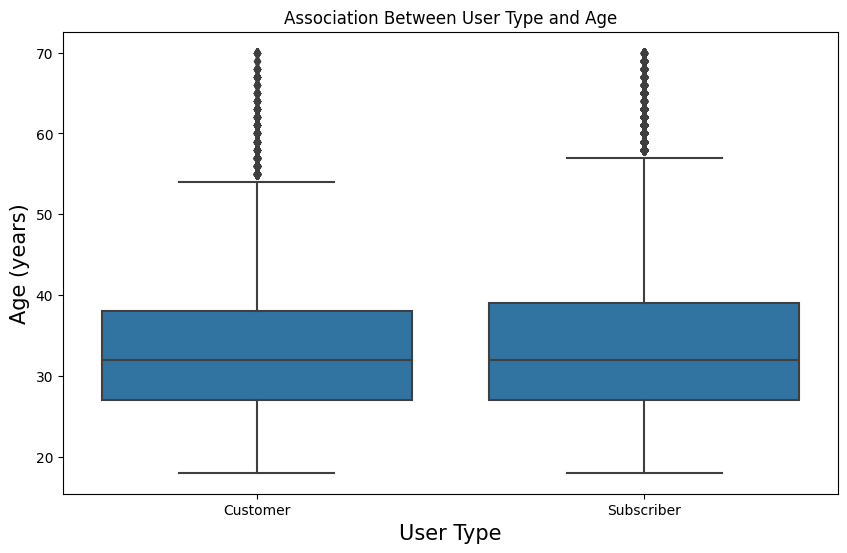

In [27]:
# Plotting the association using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='user_type', y='age', color='tab:blue')

# Format the plot visuals
plt.xlabel('User Type', size=15)
plt.ylabel('Age (years)', size=15)
plt.title('Association Between User Type and Age');

It appears that whether the user subsribes, age distribution looks the same.

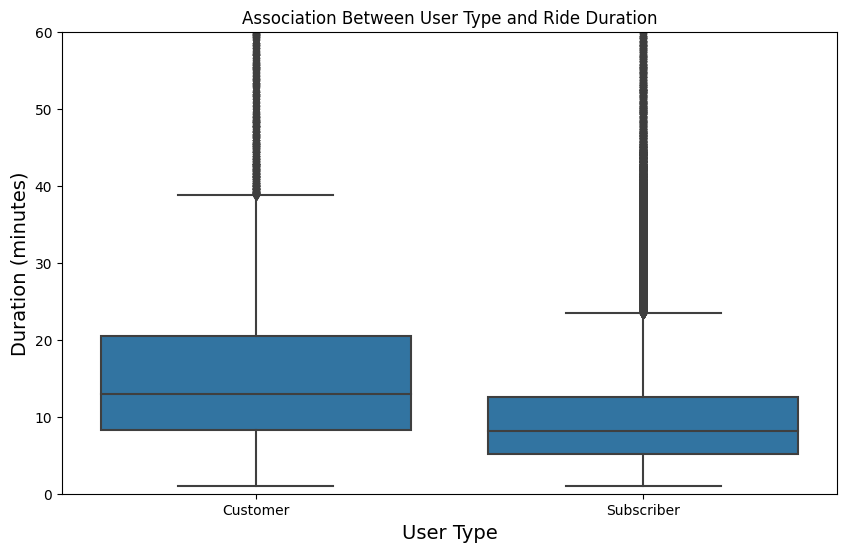

In [28]:
# Plotting the association using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='user_type', y='duration_min', color='tab:blue')

# Format the plot visuals
plt.xlabel('User Type', size=14)
plt.ylabel('Duration (minutes)', size=14)
plt.ylim(0, 60)  # Set y-axis limit for better visibility
plt.title('Association Between User Type and Ride Duration');

Surprisingly, the overall usage duration for customers is even longer than for subscribers, with the maximum value significantly exceeding that of subscribers. This result is indeed unexpected.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The distribution of `user_type` for the `member_gender` does not seem to differ significantly. The distribution of `user_tye` is subscriber 90.5% and customer 8.8%. Surprisingly, although females are far less than males, the distribution looks no different between each gender.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Surprisingly, the overall usage duration for customers is even longer than for subscribers, with the maximum value significantly exceeding that of subscribers. This result is indeed unexpected.

## Multivariate Exploration

Let's see the relationship between `gender`, `age` and `duration`.

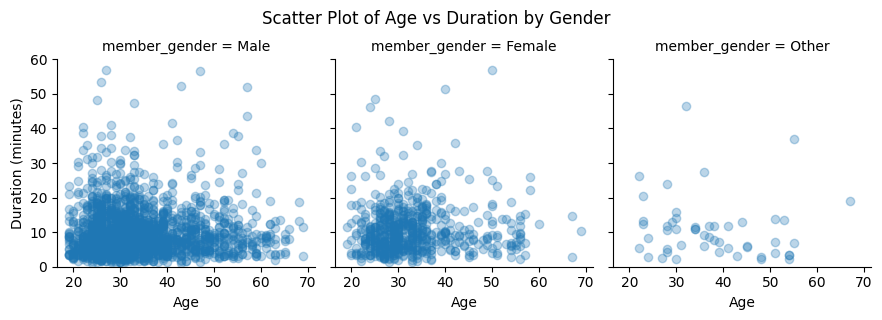

In [29]:
# Define the order of gender categories
gender_order = ['Male', 'Female', 'Other']

# Sample 2500 data points
sampled_df = df.sample(2500, replace=False)

# Create a FacetGrid with sorted gender order
g = sns.FacetGrid(data=sampled_df, col='member_gender', col_order=gender_order, height=3)

# Map scatter plot onto each facet and set y-axis limit
g.map(plt.scatter, 'age', 'duration_min', alpha=0.3).set(ylim=(0, 60))

# Add axis labels
g.set_axis_labels('Age', 'Duration (minutes)')

# Set plot title with adjusted position
g.fig.suptitle('Scatter Plot of Age vs Duration by Gender', y=1.05);

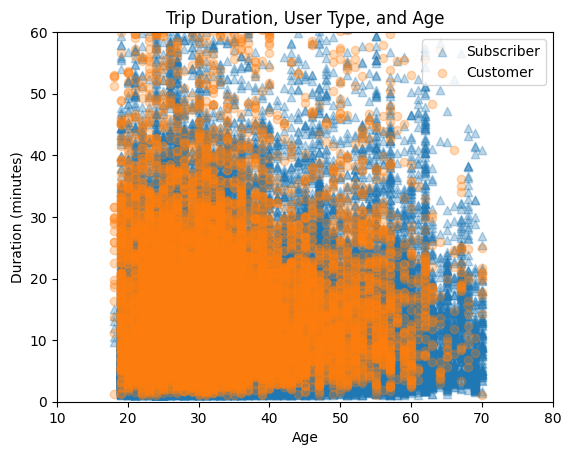

In [30]:
# Define the order of user type categories
user_type_order = ['Subscriber', 'Customer']

# Define user type markers
usertype_mark = {'Subscriber': '^', 'Customer': 'o'}

# Create a scatter plot for each user type
for utype, marker in usertype_mark.items():
    df_utype = df[df['user_type'] == utype]
    plt.scatter(df_utype['age'], df_utype['duration_min'], marker=marker, alpha=0.3)

# Add legend and set axis limits
plt.legend(usertype_mark.keys())
plt.axis([10, 80, 0, 60])

# Set plot title and labels
plt.title('Trip Duration, User Type, and Age')
plt.xlabel('Age')
plt.ylabel('Duration (minutes)');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

When we compare each `user_type` difference between age and duration. We discovered that the subscriber is more willing to ride for a longer duration than the customer.


### Were there any interesting or surprising interactions between features?

Based on the known results, we can observe that the male count far exceeds the female count. Therefore, the higher quantity of males in the distribution of ride duration and age is standard. However, when depends on a ride duration of 10 minutes, males of all age groups show a consistent, while females, especially those over 40, exhibit a noticeable decrease in numbers.

## Conclusions


### Summary of Main Findings:

**1. Trip Duration Distribution:**

- Most users spent less than 20 minutes on their bike trips.
- The majority of trips fall within the one-hour time frame.

**2. Start Ride Hours:**

- The peak usage times resemble typical commuting hours and school hours.
- Most trips occur during the morning (7-9 AM) and afternoon (4-6 PM) hours.

**3. User Type Distribution:**

- Over 90% of users are subscribers, indicating a strong loyalty to the GoBike system.
- Customers, while fewer in number, still contribute to a notable portion of the user base.

**4. Gender Distribution:**

- There are significantly more male users than female users.
- The distribution of user type does not differ significantly between genders.

**5. Age Distribution:**

- The majority of users fall within the age range of 21 to 40 years old.
- Most commuting activities occur within this age group.

**6. User Type and Gender Interaction:**

- Regardless of gender, the distribution of user type (subscriber vs. customer) looks similar.
- Subscribers constitute the majority in both male and female user groups.

**7. User Type and Age Interaction:**

- The age distribution looks similar for both subscribers and customers.
- Most users, regardless of user type, are in the 21-40 age range.

**8. Duration Discrepancy Between User Types:**

- Surprisingly, the overall usage duration for customers is longer than for subscribers.
- Subscribers tend to have shorter ride durations, while customers are willing to ride for a longer duration.

**9. Gender and Age Interaction:**

- The male count far exceeds the female count, consistent with the known demographics.
- In the context of a 10-minute ride duration, males of all age groups show consistent numbers, while females, especially those over 40, exhibit a noticeable decrease.

### Reflection on Data Exploration Steps:

**1. Univariate Exploration:**

- Identified the distribution of trip duration, start ride hours, user types, gender, and age.
- Revealed the dominance of subscribers, the prevalence of male users, and the concentration of users in the 21-40 age group.

**2. Bivariate Exploration:**

- Explored interactions between user types, genders, and age groups.
- Analyzed the relationship between user type and ride duration, discovering unexpected patterns.

**3. Multivariate Exploration:**

- Examined interactions between user type, age, and duration.
- Discovered nuanced patterns in the relationship between gender, age, and ride duration.

**4. Summary and Reflection:**

- Compiled key findings into a concise summary.
- Acknowledged unexpected results and formulated hypotheses for further investigation.
- Recognized patterns and trends that provide insights into user behavior and preferences.

Overall, the exploration uncovered intriguing relationships between user characteristics and bike ride patterns, laying the foundation for deeper analysis and hypothesis testing.

In [31]:
# Export notebook as HTML
!python3 -m nbconvert --to html *.ipynb

[NbConvertApp] Converting notebook Part_II_explanatory_template.ipynb to html
[NbConvertApp] Writing 1203270 bytes to Part_II_explanatory_template.html
[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to html
[NbConvertApp] Writing 1577452 bytes to Part_I_exploration_template.html
